# Dog-breed Classifier
---

## Contents

* [Intro](#intro)
* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans

---

<a id='intro'></a>
## Intro

시작에 앞서, 이 노트북은 Udacity의 [Deep Learning Nanodegree](https://www.udacity.com/course/deep-learning-nanodegree--nd101)에서 공부한 내용임을 알려드립니다.

이 프로젝트의 목표는 다음과 같습니다:
* Convolutional Neural Network를 이용해 나만의 모델을 만들어 이미지를 입력받아 강아지의 품종 예측합니다.
* Transfer Learning을 이용한 강아지의 품종을 예측합니다.
* 나만의 알고리즘을 만들어 사람의 얼굴을 감지했을때 가장 닮은 품종들을 알려줍니다.

아래의 이미지는 프로젝트의 예상 결과물입니다:

![Sample_Dog_Output](notebook_images/sample_dog_output.png)

---

<a id='step0'></a>
## Step 0: Import Datasets

__아래의 사람과 강아지 데이터셋이 반드시 필요합니다. 다운로드해주세요.__

* [강아지 데이터셋](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip)을 다운로드하시고 이 프로젝트의 홈 디렉토리에 압축을 풀어주세요.
* [사람 데이터셋](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip)도 마찬가지로 홈 디렉토리에 압축을 풀어주세요.

*참고: 윈도우즈 환경에서 다운로드 하실 경우, [7zip](http://www.7-zip.org/) 또는 [반디집](https://kr.bandisoft.com/bandizip/)을 사용하여 압축을 풀어주세요. 다른 프로그램은 사용해보지 않았습니다.

아래의 코드는, 강아지 데이터셋과 사람 데이터셋의 경로를 numpy array로 `human_files`와 `dog_files`라는 이름으로 저장하는 코드입니다.

In [2]:
import numpy as np
from glob import glob

# 강아지, 사람 데이터셋 파일의 경로들을 가져옵니다.
dog_files = np.array(glob('./dog_images/*/*/*'))
human_files = np.array(glob('./human_images/*/*'))

# 각 데이터셋의 갯수를 출력합니다.
print('전체 강아지 이미지 수: %d' % len(dog_files))
print('전체 사람 이미지 수: %d' % len(human_files))

전체 강아지 이미지 수: 8351
전체 사람 이미지 수: 13233


---

<a id='step1'></a>
## Step 1: Detect Humans

해당 섹션에서는 OpenCV를 이용하여 [Haar feature-based cascade classifier](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html)를 이용하여 사람의 얼굴을 감지할 것 입니다.

OpenCV는 [github](https://github.com/opencv/opencv/tree/master/data/haarcascades)에 XML 파일의 형태로 pre-trained된 많은 face detector를 제공합니다. 그 중 하나의 디텍터를 다운로드하여 `haardcascades` 디렉토리에 저장하였습니다. 다음의 코드는, 샘플 이미지에서 얼굴을 찾는 디텍터의 사용방법을 나타냅니다.

발견된 얼굴의 수: 1


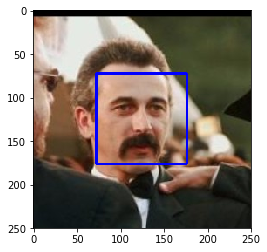

In [8]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Pre-trained된 Haar feature-based cascade classifier를 불러옵니다.
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_alt.xml')

# 하나의 샘플 이미지를 읽어옵니다.
# OpenCV는 기본적으로 BGR형태로 이미지를 불러옵니다.
img = cv2.imread(human_files[10])

# BGR 이미지를 grayscale로 변환합니다.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴을 찾아냅니다.
faces = face_cascade.detectMultiScale(gray)

# 해당 이미지에서 몇개의 얼굴을 발견했는지 출력합니다.
print('발견된 얼굴의 수:', len(faces))

# 발견된 얼굴에 사각형 테두리를 그려줍니다.
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
# BGR 이미지를 RGB 이미지로 변환합니다.
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 사각형 테두리가 그려진 얼굴 이미지를 보여줍니다.
plt.imshow(cv_rgb)
plt.show()

어떤 종류의 face detector를 이용하던지, 사용하기전 __이미지들을 grayscale로 변환하는 일은 필수적입니다.__ `detectMultiScale` 함수는 grayscale 이미지를 파라미터로 입력 받습니다.

위의 코드에서 `faces`는 감지된 얼굴을 numpy array의 형태로 가지고 있습니다.

###  Write a Human Face Detector 

입력된 이미지에서 감지된 사람 얼굴이 있을때 `True`를, 그렇지 않으면 `False`를 리턴하는 함수를 작성합니다. 아래는 하나의 이미지 파일 경로를 string의 형태로 입력받는 Human Face Detector입니다.

In [11]:
# img_path에 저장된 이미지에서 얼굴이 발견된다면 True를 리턴합니다.
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### Assess the Human Face Detector

__Question 1:__ 작성한 `face_detector` 함수를 테스트 해봅니다.
* `human_files`의 처음 100개의 이미지에서 사람 얼굴이 감지된 퍼센트는?
* `dog_files`의 처음 100개의 이미지에서 사람 얼굴이 감지된 퍼센트는?

__Answer:__ (코드를 작성하여 실행시켜 질문에 대한 답을 찾습니다.)

In [14]:
from tqdm import tqdm

# 각 데이터셋에서 처음 100개의 이미지를 가져옵니다.
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

# 각 데이터셋에서 감지된 횟수를 초기화합니다.
human_detected = 0.0
dog_detected = 0.0

# 전체 파일 갯수를 가져옵니다.
num_files = len(human_files_short)

for i in range(0, num_files):
    human_path = human_files_short[i]
    dog_path = dog_files_short[i]
    
    if face_detector(human_path) == True:
        human_detected += 1
    if face_detector(dog_path) == True:
        dog_detected += 1
        
print('Haar Face Detection')
print('사람 데이터셋에서 얼굴이 감지된 확률:{: .0%}'.format(human_detected / num_files))
print('강아지 데이터셋에서 얼굴이 감지된 확률:{: .0%}'.format(dog_detected / num_files))

Haar Face Detection
사람 데이터셋에서 얼굴이 감지된 확률: 96%
강아지 데이터셋에서 얼굴이 감지된 확률: 18%
